In [121]:
import cv2
import numpy as np

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
img = cv2.imread('Capture.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(418L, 446L, 3L)

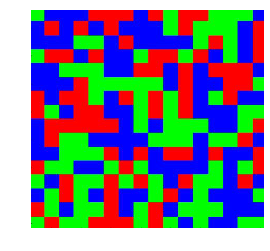

In [124]:
plt.figure()
plt.axis("off")
plt.imshow(img)

In [125]:
img = img.reshape((img.shape[0] * img.shape[1], 3))
print (img)
img.shape

[[  0 255   1]
 [  0 255   1]
 [  0 255   1]
 ...
 [ 10 250   5]
 [  0 255   3]
 [  0 255   1]]


(186428L, 3L)

In [126]:
from sklearn.cluster import KMeans
K = 3
clf = KMeans(n_clusters=K,max_iter=1000000000)
clf.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000000000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [127]:
label = [0, 0, 0]
for x in clf.labels_:
    label[x] += 1

print (label)

[60623, 71000, 54805]


In [128]:
label_sum = img.shape[0]
label = [(float(x) / label_sum) for x in label]
print (label)


[0.32518183963782266, 0.38084407921556845, 0.2939740811466089]


[[6, 247, 8], [5, 3, 243], [244, 4, 6]]
[u'#06f708', u'#0503f3', u'#f40406']


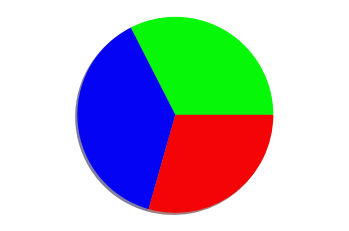

In [129]:
import webcolors

centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]
print (centroids)
clr = [webcolors.rgb_to_hex(c) for c in centroids]
print (clr)
plt.pie(label, colors=clr, shadow=True) 
plt.axis('equal')
plt.show()


In [130]:
from __future__ import print_function
from scipy.spatial import KDTree

    # lets populate some names into spatial name database
hexnames = webcolors.css3_hex_to_names
names = []
positions = []

for hex, name in hexnames.iteritems():
    names.append(name)
    positions.append(webcolors.hex_to_rgb(hex))

spacedb = KDTree(positions)

def getcolorname(colorcode):
    new = webcolors.hex_to_rgb(colorcode)
    dist, index = spacedb.query(new)

    return names[index]
import pandas as pd
df = pd.DataFrame({
    'Image':[],
    'Dominant color percentage':[],
    'Color':[]
})
df = pd.DataFrame({
    'Image':[],
    'Dominant color percentage':[],
    'Color':[]
})

In [131]:
data=[]
def imganalysis(image):
    img = cv2.imread(image) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure()
    plt.axis("off")
    plt.imshow(img)
    img = img.reshape((img.shape[0] * img.shape[1], 3))
    
    
    clf.fit(img)
    
    label = [0, 0, 0]
    for x in clf.labels_:
        label[x] += 1

    #print label
    label_sum = img.shape[0]
    label = [(float(x) / label_sum)*100 for x in label]
    #print label
    centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]
    #print centroids
    clr = [webcolors.rgb_to_hex(c) for c in centroids]
    #print clr
    plt.figure()
    plt.pie(label, colors=clr, shadow=True) 
    plt.axis('equal')
    plt.show()
    hexcode=clr[label.index(max(label))]
    colorname = getcolorname(hexcode)
    print ("color is "+ str(hexcode) + " at " + str(round(label[label.index(max(label))],2)) + " percent and is closest to " +str(colorname))  
    l = []
    l.append('Image'+str(i))
    l.append(max(label))
    l.append(hexcode)
    data.append(l)
   

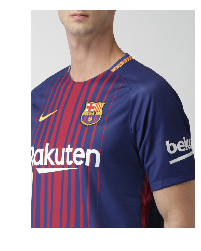

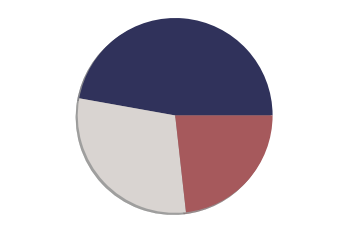

color is #30325b at 47.19 percent and is closest to darkslategray


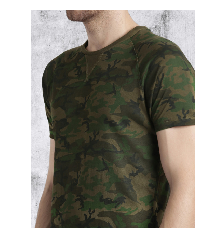

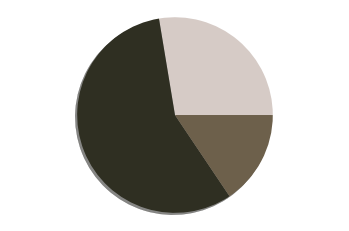

color is #2f2f22 at 56.8 percent and is closest to darkslategray


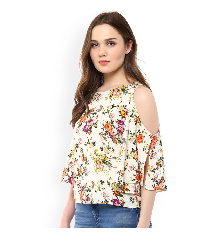

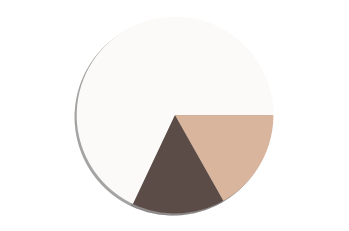

color is #fbfaf8 at 67.98 percent and is closest to snow


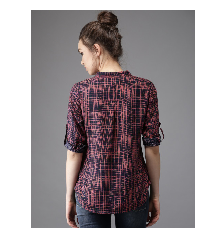

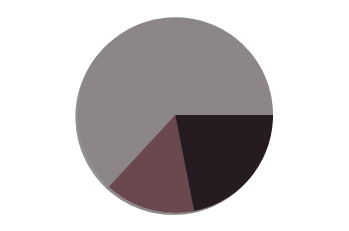

color is #8c8688 at 63.12 percent and is closest to grey


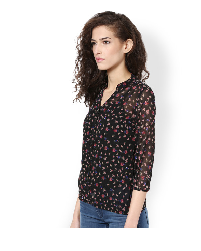

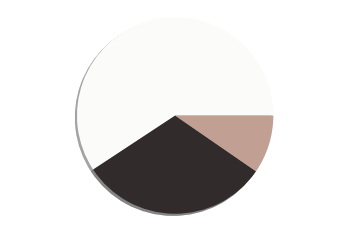

color is #fbfbfa at 59.27 percent and is closest to snow


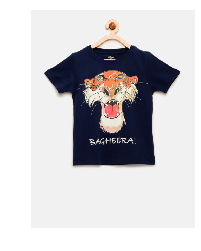

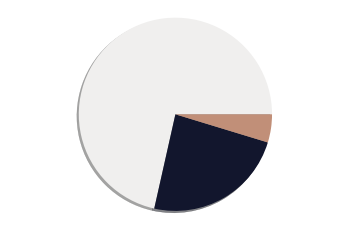

color is #f0efee at 71.48 percent and is closest to whitesmoke


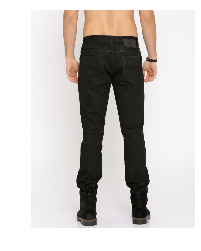

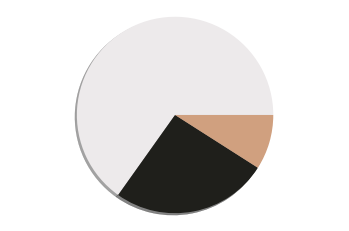

color is #edeaeb at 65.16 percent and is closest to linen


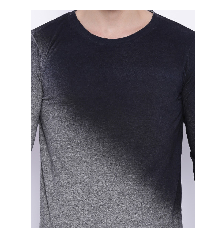

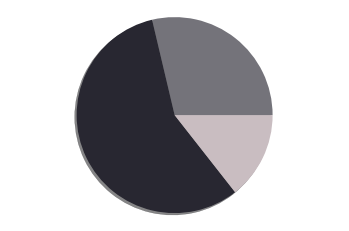

color is #282731 at 56.89 percent and is closest to darkslategray


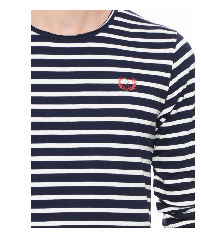

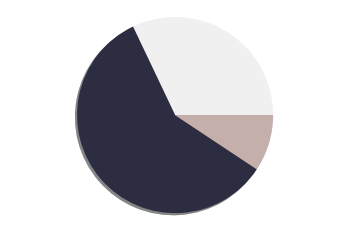

color is #2c2d40 at 58.61 percent and is closest to darkslategray


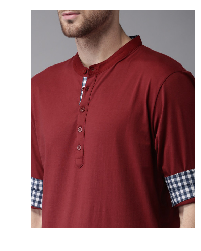

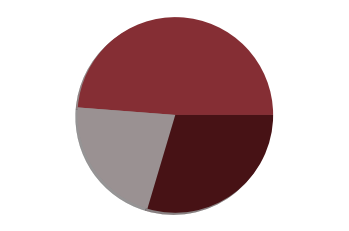

color is #852e34 at 48.78 percent and is closest to brown


In [132]:
for i in range (1,11):
    key = "Dominant Color Data Set/image "+str(i)+".jpg"
    imganalysis(key)
    df = df.append(pd.DataFrame({
        'Image':[data[i-1][0]],    
        'Dominant color percentage':[data[i-1][1]],
        'Color':[data[i-1][2]]
    }))


In [133]:
import seaborn as sns
sns.set()
print (df)

     Color  Dominant color percentage    Image
0  #30325b                  47.187500   Image1
0  #2f2f22                  56.800456   Image2
0  #fbfaf8                  67.976562   Image3
0  #8c8688                  63.124349   Image4
0  #fbfbfa                  59.266927   Image5
0  #f0efee                  71.481771   Image6
0  #edeaeb                  65.162435   Image7
0  #282731                  56.889648   Image8
0  #2c2d40                  58.611979   Image9
0  #852e34                  48.775716  Image10


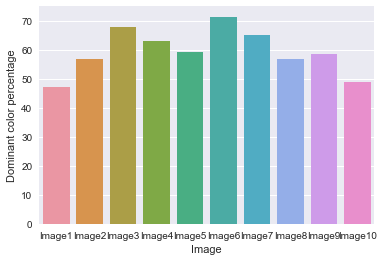

In [134]:
sns.barplot(data=df,x="Image",y='Dominant color percentage')

In [138]:
Color = [['Blue',20.84],['Black',11.5],['White',29.61],['Red',10.16],['Grey',18.47],['Green',1.41],
           ['Salmon',5.5],['Brown',2.45]]
graph = pd.DataFrame(Color,columns=['Color','Average'],dtype=float)
print (graph)

    Color  Average
0    Blue    20.84
1   Black    11.50
2   White    29.61
3     Red    10.16
4    Grey    18.47
5   Green     1.41
6  Salmon     5.50
7   Brown     2.45


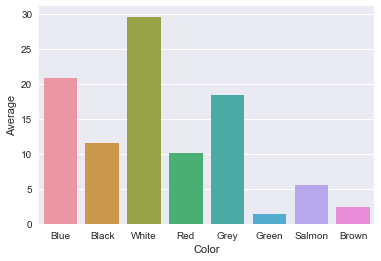

In [139]:
sns.barplot(x='Color',y='Average',data=graph)